In [5]:
import cv2
import glob
import numpy as np
import numpy
import os
import matplotlib.pyplot as plt

from win32gui import GetWindowText, GetForegroundWindow, GetWindowRect, FindWindow
import pyscreenshot as ImageGrab
import time
import os
from IPython.display import display, clear_output
import datetime
from KartriderKit.Utils.location import locateOnPicture, locateCenterOnPicture
'''
# if the foreground window is as the same as desired_window, then this script will capture your current screen and check current scenario.
# which is faster than capture screenshot using Nox.
'''
WORKPATH = "D:/GameProjects/Kartrider/SmartKartRider"
desired_window = "BlueStacks App Player"
adb_port = 60034
os.chdir(WORKPATH)

In [6]:
target_size = (1280,720)
model_input_shape = (299,299)
first_classes = ['dialog', 'loading', 'others', 'reward']
second_classes = ['idle', 'inQuest']

In [8]:
# The Nox install path

'''
The simulator default port, if you using multiple simulator, you should change the port.
You can check your port number use : os.popen('adb devices').read()
'''
print(os.popen('adb devices').read())
connect = os.popen("adb connect 127.0.0.1:" + str(adb_port)).read()
print(connect)

List of devices attached
127.0.0.1:60034	device


already connected to 127.0.0.1:60034



In [9]:
def read_and_resize(path,target_size):
    return cv2.resize(cv2.imread(path),target_size)/255

def crop_img(inputImg, scenario,model_input_shape):
    if scenario == 'reward':
        return inputImg[:,335:940]
    elif scenario == 'dialog':
        return inputImg[460:,]
    elif scenario == 'questArrow':
        return inputImg[460:,]
    elif scenario == 'autoIcon':
        icon = inputImg[632:698,351:416]
        icon = cv2.resize(icon,model_input_shape)
        return icon

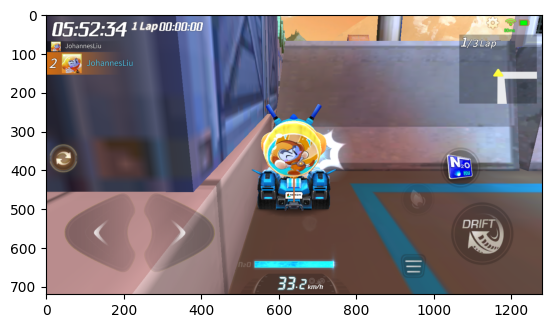

In [35]:
os.system('adb shell screencap -p /sdcard/screenshot.png')
os.system('adb pull /sdcard/screenshot.png ./screenshot.png')
im = cv2.imread('./screenshot.png')
plt.imshow(im)

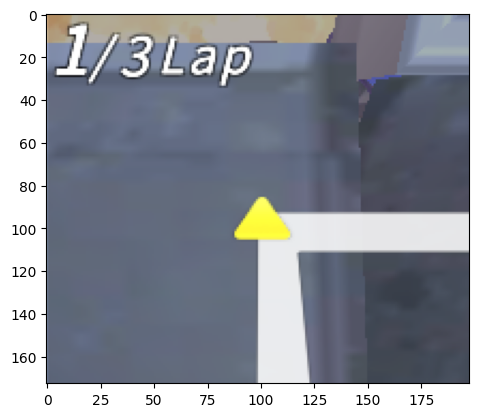

In [60]:
smallMap = cv2.imread('./screenshot.png', 1)[55:228, 1066:1264]
plt.imshow(smallMap)

In [1]:
cv2.imwrite('./smallMap.png', 1)[55:228, 1066:1264]

NameError: name 'cv2' is not defined

In [53]:
# hsv_img = cv2.cvtColor(smallMap, cv2.COLOR_BGR2HSV)
# lower_color = (30,120,130)
# upper_color = (60,255,255)
# mask_img = cv2.inRange(hsv_img, lower_color, upper_color)
# plt.imshow(mask_img)
#
